In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
cell = pd.read_csv('../data/raw/smartphonesmessy.csv')

In [3]:
cell

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...
1015,Motorola Moto Edge S30 Pro,"₹34,990",83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio
1016,Honor X8 5G,"₹14,990",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,POCO X4 GT 5G (8GB RAM + 256GB),"₹28,990",85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,Motorola Moto G91 5G,"₹19,990",80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


In [4]:
cell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [5]:
cell.describe()

,rating
count,879.000000
mean,78.258248
std,7.402854
min,60.000000
25%,74.000000
50%,80.000000
75%,84.000000
max,89.000000


In [6]:
filas_nan = cell[cell.isnull().any(axis=1)]

In [7]:
filas_nan

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
14,Samsung Galaxy S23 Ultra 5G,"₹1,14,990",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.8 inches, 1440 x 3088 px, 120 Hz Display wit...",200 MP Quad Rear & 12 MP Front Camera,Memory Card Not Supported,Android v13
29,OnePlus 11 Pro,"₹69,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Android v13,No FM Radio
37,Samsung Galaxy S22 Ultra 5G,"₹91,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.8 inches, 1440 x 3080 px, 120 Hz Display wit...",108 MP Quad Rear & 40 MP Front Camera,Android v12,Bluetooth
49,Samsung Galaxy A74 5G,"₹42,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 7 Gen1, Octa Core, 2.36 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP Quad Rear & 32 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v12
69,Oppo Find N Fold,"₹99,990",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",64 MP + 10 MP + 8 MP Triple Rear & 32 MP Front...,Android v12
...,...,...,...,...,...,...,...,...,...,...,...
996,Vivo Y55S,"₹13,490",NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 425, Quad Core, 1.2 GHz Processor","3 GB RAM, 16 GB inbuilt",2730 mAh Battery,"5.2 inches, 720 x 1280 px Display",13 MP Rear & 5 MP Front Camera,Memory Card Supported,Android v6.0 (Marshmallow)
1000,XTouch F40 Flip,"₹1,999",NaN,Dual Sim,No 3G,No Wifi,"32 MB RAM, 32 MB inbuilt",800 mAh Battery,"1.77 inches, 240 x 320 px Display",Dual Display,1.3 MP Rear Camera
1003,Lava X3,"₹6,999",NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio A22, Quad Core, 2 GHz Processor","3 GB RAM, 32 GB inbuilt",4000 mAh Battery,"6.5 inches, 1600 x 720 px Display with Water D...",8 MP Dual Rear & 5 MP Front Camera,"Memory Card (Hybrid), upto 512 GB",Android v12
1012,itel A23s,"₹4,787",NaN,"Dual Sim, 3G, 4G, Wi-Fi","Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor","2 GB RAM, 32 GB inbuilt",3020 mAh Battery,"5 inches, 854 x 480 px Display",2 MP Rear Camera,Android v11,No FM Radio


In [8]:
filas_nan

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
14,Samsung Galaxy S23 Ultra 5G,"₹1,14,990",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.8 inches, 1440 x 3088 px, 120 Hz Display wit...",200 MP Quad Rear & 12 MP Front Camera,Memory Card Not Supported,Android v13
29,OnePlus 11 Pro,"₹69,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Android v13,No FM Radio
37,Samsung Galaxy S22 Ultra 5G,"₹91,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.8 inches, 1440 x 3080 px, 120 Hz Display wit...",108 MP Quad Rear & 40 MP Front Camera,Android v12,Bluetooth
49,Samsung Galaxy A74 5G,"₹42,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 7 Gen1, Octa Core, 2.36 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP Quad Rear & 32 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v12
69,Oppo Find N Fold,"₹99,990",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",64 MP + 10 MP + 8 MP Triple Rear & 32 MP Front...,Android v12
...,...,...,...,...,...,...,...,...,...,...,...
996,Vivo Y55S,"₹13,490",NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 425, Quad Core, 1.2 GHz Processor","3 GB RAM, 16 GB inbuilt",2730 mAh Battery,"5.2 inches, 720 x 1280 px Display",13 MP Rear & 5 MP Front Camera,Memory Card Supported,Android v6.0 (Marshmallow)
1000,XTouch F40 Flip,"₹1,999",NaN,Dual Sim,No 3G,No Wifi,"32 MB RAM, 32 MB inbuilt",800 mAh Battery,"1.77 inches, 240 x 320 px Display",Dual Display,1.3 MP Rear Camera
1003,Lava X3,"₹6,999",NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio A22, Quad Core, 2 GHz Processor","3 GB RAM, 32 GB inbuilt",4000 mAh Battery,"6.5 inches, 1600 x 720 px Display with Water D...",8 MP Dual Rear & 5 MP Front Camera,"Memory Card (Hybrid), upto 512 GB",Android v12
1012,itel A23s,"₹4,787",NaN,"Dual Sim, 3G, 4G, Wi-Fi","Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor","2 GB RAM, 32 GB inbuilt",3020 mAh Battery,"5 inches, 854 x 480 px Display",2 MP Rear Camera,Android v11,No FM Radio


In [9]:
filas_nan['rating'].fillna(78.258, inplace=True)

C:\Users\taylo\AppData\Local\Temp\ipykernel_4700\278775140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filas_nan['rating'].fillna(78.258, inplace=True)


In [10]:
filas_nan

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
14,Samsung Galaxy S23 Ultra 5G,"₹1,14,990",78.258,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.8 inches, 1440 x 3088 px, 120 Hz Display wit...",200 MP Quad Rear & 12 MP Front Camera,Memory Card Not Supported,Android v13
29,OnePlus 11 Pro,"₹69,999",78.258,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Android v13,No FM Radio
37,Samsung Galaxy S22 Ultra 5G,"₹91,999",78.258,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.8 inches, 1440 x 3080 px, 120 Hz Display wit...",108 MP Quad Rear & 40 MP Front Camera,Android v12,Bluetooth
49,Samsung Galaxy A74 5G,"₹42,999",78.258,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 7 Gen1, Octa Core, 2.36 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP Quad Rear & 32 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v12
69,Oppo Find N Fold,"₹99,990",78.258,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",64 MP + 10 MP + 8 MP Triple Rear & 32 MP Front...,Android v12
...,...,...,...,...,...,...,...,...,...,...,...
996,Vivo Y55S,"₹13,490",78.258,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 425, Quad Core, 1.2 GHz Processor","3 GB RAM, 16 GB inbuilt",2730 mAh Battery,"5.2 inches, 720 x 1280 px Display",13 MP Rear & 5 MP Front Camera,Memory Card Supported,Android v6.0 (Marshmallow)
1000,XTouch F40 Flip,"₹1,999",78.258,Dual Sim,No 3G,No Wifi,"32 MB RAM, 32 MB inbuilt",800 mAh Battery,"1.77 inches, 240 x 320 px Display",Dual Display,1.3 MP Rear Camera
1003,Lava X3,"₹6,999",78.258,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio A22, Quad Core, 2 GHz Processor","3 GB RAM, 32 GB inbuilt",4000 mAh Battery,"6.5 inches, 1600 x 720 px Display with Water D...",8 MP Dual Rear & 5 MP Front Camera,"Memory Card (Hybrid), upto 512 GB",Android v12
1012,itel A23s,"₹4,787",78.258,"Dual Sim, 3G, 4G, Wi-Fi","Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor","2 GB RAM, 32 GB inbuilt",3020 mAh Battery,"5 inches, 854 x 480 px Display",2 MP Rear Camera,Android v11,No FM Radio


In [11]:
filtro_sams = cell[cell['model'].str.contains('samsung', case=False)]

In [12]:
filtro_sams

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
5,Samsung Galaxy F23 5G (6GB RAM + 128GB),"₹16,999",80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 750G, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.6 inches, 1080 x 2408 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 8 MP Front C...,"Memory Card Supported, upto 1 TB",Android v12
14,Samsung Galaxy S23 Ultra 5G,"₹1,14,990",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.8 inches, 1440 x 3088 px, 120 Hz Display wit...",200 MP Quad Rear & 12 MP Front Camera,Memory Card Not Supported,Android v13
25,Samsung Galaxy S20 FE 5G,"₹31,239",88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 865, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with Fast Charging,"6.5 inches, 1080 x 2400 px, 120 Hz Display wit...",12 MP + 12 MP + 8 MP Triple Rear & 32 MP Front...,Memory Card (Hybrid),Android v10
34,Samsung Galaxy M53 5G,"₹23,790",85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 900 5G, Octa Core, 2.4 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2400 px, 120 Hz Display wit...",108 MP Quad Rear & 32 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v12
...,...,...,...,...,...,...,...,...,...,...,...
978,Samsung Galaxy A21s (6GB RAM + 128GB),"₹17,499",75.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Exynos 850, Octa Core, 2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery,"6.5 inches, 720 x 1600 px Display with Punch Hole",48 MP Quad Rear & 13 MP Front Camera,"Memory Card Supported, upto 512 GB",Android v10
991,Samsung Galaxy A11,"₹9,990",63.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Octa Core, 1.8 GHz Processor","2 GB RAM, 32 GB inbuilt",4000 mAh Battery with 15W Fast Charging,"6.4 inches, 720 x 1560 px Display with Punch Hole",13 MP + 5 MP + 2 MP Triple Rear & 8 MP Front C...,"Memory Card Supported, upto 512 GB",Android v10
994,Samsung Galaxy A9 Pro (2019),"₹39,990",78.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC","Snapdragon 710, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",3400 mAh Battery with Fast Charging,"6.4 inches, 1080 x 2340 px Display with Punch ...",24 MP + 10 MP + 5 MP Triple Rear & 24 MP Front...,"Memory Card Supported, upto 512 GB",Android v9.0 (Pie)
995,Samsung Galaxy A7 (2018),"₹21,490",70.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Exynos 7885, Octa Core, 2.2 GHz Processor","4 GB RAM, 64 GB inbuilt",3300 mAh Battery,"6 inches, 2220 x 1080 px Display",24 MP + 8 MP + 5 MP Triple Rear & 24 MP Front ...,"Memory Card Supported, upto 512 GB",Android v8.0 (Oreo)


In [13]:
prueba = pd.read_csv('../../src/data/process/filasnan.csv')

In [14]:
prueba

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,Samsung Galaxy S23 Ultra 5G,"₹1,14,990",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.8 inches, 1440 x 3088 px, 120 Hz Display wit...",200 MP Quad Rear & 12 MP Front Camera,Memory Card Not Supported,Android v13
1,OnePlus 11 Pro,"₹69,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Android v13,No FM Radio
2,Samsung Galaxy S22 Ultra 5G,"₹91,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.8 inches, 1440 x 3080 px, 120 Hz Display wit...",108 MP Quad Rear & 40 MP Front Camera,Android v12,Bluetooth
3,Samsung Galaxy A74 5G,"₹42,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 7 Gen1, Octa Core, 2.36 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP Quad Rear & 32 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Oppo Find N Fold,"₹99,990",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",64 MP + 10 MP + 8 MP Triple Rear & 32 MP Front...,Android v12
...,...,...,...,...,...,...,...,...,...,...,...
136,Vivo Y55S,"₹13,490",NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 425, Quad Core, 1.2 GHz Processor","3 GB RAM, 16 GB inbuilt",2730 mAh Battery,"5.2 inches, 720 x 1280 px Display",13 MP Rear & 5 MP Front Camera,Memory Card Supported,Android v6.0 (Marshmallow)
137,XTouch F40 Flip,"₹1,999",NaN,Dual Sim,No 3G,No Wifi,"32 MB RAM, 32 MB inbuilt",800 mAh Battery,"1.77 inches, 240 x 320 px Display",Dual Display,1.3 MP Rear Camera
138,Lava X3,"₹6,999",NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio A22, Quad Core, 2 GHz Processor","3 GB RAM, 32 GB inbuilt",4000 mAh Battery,"6.5 inches, 1600 x 720 px Display with Water D...",8 MP Dual Rear & 5 MP Front Camera,"Memory Card (Hybrid), upto 512 GB",Android v12
139,itel A23s,"₹4,787",NaN,"Dual Sim, 3G, 4G, Wi-Fi","Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor","2 GB RAM, 32 GB inbuilt",3020 mAh Battery,"5 inches, 854 x 480 px Display",2 MP Rear Camera,Android v11,No FM Radio


In [15]:
prueba['rating'].fillna(78.258, inplace=True)

In [16]:
pruebasinrat = prueba[prueba.isnull().any(axis=1)]

In [17]:
pruebasinrat.to_csv('../../src/data/process/pruebanansrating.csv', index=False)

In [18]:
sinrating = pd.read_csv('../../src/data/process/pruebanansrating.csv')

In [19]:
sinrating

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,Nokia 110 4G,"₹1,762",78.258,"Dual Sim, 3G, 4G, VoLTE",No Wifi,"128 MB RAM, 48 MB inbuilt",1020 mAh Battery,"1.8 inches, 120 x 160 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",NaN
1,Samsung Guru Music 2 Dual Sim,"₹1,949",78.258,Dual Sim,No Wifi,"Single Core, 208 MHz Processor",800 mAh Battery,"2 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 16 GB",NaN
2,Nokia 105 (2019),"₹1,299",78.258,Single Sim,No Wifi,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 120 x 160 px Display",No Rear Camera,NaN,NaN
3,Namotel Achhe Din,₹99,78.258,"Dual Sim, 3G, Wi-Fi","1 GB RAM, 4 GB inbuilt",1325 mAh Battery,"4 inches, 720 x 1280 px Display",2 MP Rear & 0.3 MP Front Camera,Android v5.0 (Lollipop),Bluetooth,NaN
4,Nokia 105 Plus,"₹1,299",78.258,Dual Sim,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN
5,Nokia 2760 Flip,"₹5,490",78.258,"Dual Sim, 3G, 4G, Wi-Fi",1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0,Bluetooth,NaN
6,Motorola Moto A10,"₹1,339",78.258,Dual Sim,"4 MB RAM, 4 MB inbuilt",1750 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",NaN,NaN
7,Zanco Tiny T1,"₹2,799",78.258,Single Sim,"32 MB RAM, 32 MB inbuilt",200 mAh Battery,"0.49 inches, 64 x 32 px Display",No Rear Camera,No FM Radio,Bluetooth,NaN
8,itel it2163S,₹958,78.258,Dual Sim,"4 MB RAM, 4 MB inbuilt",1200 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN
9,Samsung Guru GT-E1215,"₹1,850",78.258,Single Sim,800 mAh Battery,"1.5 inches, 120 x 120 px Display",No Rear Camera,No FM Radio,NaN,NaN,NaN


In [20]:
sinrating.to_csv('../../src/data/process/sinrating.csv', index=False)

In [21]:
sinrating2 = pd.read_csv('../../src/data/process/sinrating.csv')

In [22]:
sinrating2

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,Nokia 110 4G,"₹1,762",78.258,"Dual Sim, 3G, 4G, VoLTE",No Wifi,"128 MB RAM, 48 MB inbuilt",1020 mAh Battery,"1.8 inches, 120 x 160 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",NaN
1,Samsung Guru Music 2 Dual Sim,"₹1,949",78.258,Dual Sim,No Wifi,"Single Core, 208 MHz Processor",800 mAh Battery,"2 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 16 GB",NaN
2,Nokia 105 (2019),"₹1,299",78.258,Single Sim,No Wifi,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 120 x 160 px Display",No Rear Camera,NaN,NaN
3,Namotel Achhe Din,₹99,78.258,"Dual Sim, 3G, Wi-Fi","1 GB RAM, 4 GB inbuilt",1325 mAh Battery,"4 inches, 720 x 1280 px Display",2 MP Rear & 0.3 MP Front Camera,Android v5.0 (Lollipop),Bluetooth,NaN
4,Nokia 105 Plus,"₹1,299",78.258,Dual Sim,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN
5,Nokia 2760 Flip,"₹5,490",78.258,"Dual Sim, 3G, 4G, Wi-Fi",1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0,Bluetooth,NaN
6,Motorola Moto A10,"₹1,339",78.258,Dual Sim,"4 MB RAM, 4 MB inbuilt",1750 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",NaN,NaN
7,Zanco Tiny T1,"₹2,799",78.258,Single Sim,"32 MB RAM, 32 MB inbuilt",200 mAh Battery,"0.49 inches, 64 x 32 px Display",No Rear Camera,No FM Radio,Bluetooth,NaN
8,itel it2163S,₹958,78.258,Dual Sim,"4 MB RAM, 4 MB inbuilt",1200 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN
9,Samsung Guru GT-E1215,"₹1,850",78.258,Single Sim,800 mAh Battery,"1.5 inches, 120 x 120 px Display",No Rear Camera,No FM Radio,NaN,NaN,NaN


In [23]:
sinratingnios = sinrating2[sinrating2.isnull().any(axis=1)]

In [24]:
sinratingnios

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,Nokia 110 4G,"₹1,762",78.258,"Dual Sim, 3G, 4G, VoLTE",No Wifi,"128 MB RAM, 48 MB inbuilt",1020 mAh Battery,"1.8 inches, 120 x 160 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",NaN
1,Samsung Guru Music 2 Dual Sim,"₹1,949",78.258,Dual Sim,No Wifi,"Single Core, 208 MHz Processor",800 mAh Battery,"2 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 16 GB",NaN
2,Nokia 105 (2019),"₹1,299",78.258,Single Sim,No Wifi,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 120 x 160 px Display",No Rear Camera,NaN,NaN
3,Namotel Achhe Din,₹99,78.258,"Dual Sim, 3G, Wi-Fi","1 GB RAM, 4 GB inbuilt",1325 mAh Battery,"4 inches, 720 x 1280 px Display",2 MP Rear & 0.3 MP Front Camera,Android v5.0 (Lollipop),Bluetooth,NaN
4,Nokia 105 Plus,"₹1,299",78.258,Dual Sim,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN
5,Nokia 2760 Flip,"₹5,490",78.258,"Dual Sim, 3G, 4G, Wi-Fi",1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0,Bluetooth,NaN
6,Motorola Moto A10,"₹1,339",78.258,Dual Sim,"4 MB RAM, 4 MB inbuilt",1750 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",NaN,NaN
7,Zanco Tiny T1,"₹2,799",78.258,Single Sim,"32 MB RAM, 32 MB inbuilt",200 mAh Battery,"0.49 inches, 64 x 32 px Display",No Rear Camera,No FM Radio,Bluetooth,NaN
8,itel it2163S,₹958,78.258,Dual Sim,"4 MB RAM, 4 MB inbuilt",1200 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN
9,Samsung Guru GT-E1215,"₹1,850",78.258,Single Sim,800 mAh Battery,"1.5 inches, 120 x 120 px Display",No Rear Camera,No FM Radio,NaN,NaN,NaN


In [25]:
# sinratingnios.to_csv('../../src/data/process/sinratingnios.cvs', index=False)

In [26]:
niratingnios = pd.read_csv('../../src/data/process/sinratingnios.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../../src/data/process/sinratingnios.csv'

In [ ]:
niratingnios

NameError: name 'niratingnios' is not defined

In [ ]:
niratingnios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      7 non-null      object 
 1   price      7 non-null      object 
 2   rating     7 non-null      float64
 3   sim        7 non-null      object 
 4   processor  7 non-null      object 
 5   ram        7 non-null      object 
 6   battery    7 non-null      object 
 7   display    7 non-null      object 
 8   camera     6 non-null      object 
 9   card       7 non-null      object 
 10  os         7 non-null      object 
dtypes: float64(1), object(10)
memory usage: 748.0+ bytes


In [ ]:
niratingnios['card'].fillna('nocard', inplace=True)

In [ ]:
niratingnios

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,Nokia 105 (2019),"₹1,299",78.258,Single Sim,No Wifi,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 120 x 160 px Display",No Rear Camera,nocard,andoid
1,Motorola Moto A10,"₹1,339",78.258,Dual Sim,"4 MB RAM, 4 MB inbuilt",1750 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",nocard,andoid
2,Samsung Guru GT-E1215,"₹1,850",78.258,Single Sim,800 mAh Battery,"1.5 inches, 120 x 120 px Display",No Rear Camera,No FM Radio,NaN,nocard,andoid
3,Eunity U1 King,₹599,78.258,Dual Sim,1.77 MHz Processor,"32 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 260 x 240 px Display",0.3 MP Rear Camera,nocard,andoid
4,Nokia 110 (2022),"₹1,599",78.258,Dual Sim,No Wifi,"4 MB RAM, 4 MB inbuilt",1000 mAh Battery,"1.77 inches, 120 x 160 px Display","Memory Card Supported, upto 32 GB",nocard,andoid
5,Samsung Guru E1200,"₹1,685",78.258,Single Sim,No Wifi,800 mAh Battery,"1.5 inches, 128 x 128 px Display",No Rear Camera,No FM Radio,nocard,andoid
6,Eunity U1 Livo,₹649,78.258,Dual Sim,1.77 MHz Processor,"16 MB RAM, 16 MB inbuilt",1000 mAh Battery,"1.8 inches, 280 x 240 px Display",0.3 MP Rear Camera,nocard,andoid


In [ ]:
niratingnios.to_csv('../../src/data/process/solo1nan.csv', index=False)

In [ ]:
solo1nan = pd.read_csv('../../src/data/process/solo1nan.csv')

In [ ]:
solo1nan

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,Nokia 105 (2019),"₹1,299",78.258,Single Sim,No Wifi,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 120 x 160 px Display",No Rear Camera,nocard,andoid
1,Motorola Moto A10,"₹1,339",78.258,Dual Sim,"4 MB RAM, 4 MB inbuilt",1750 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",nocard,andoid
2,Samsung Guru GT-E1215,"₹1,850",78.258,Single Sim,800 mAh Battery,"1.5 inches, 120 x 120 px Display",No Rear Camera,No FM Radio,NaN,nocard,andoid
3,Eunity U1 King,₹599,78.258,Dual Sim,1.77 MHz Processor,"32 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 260 x 240 px Display",0.3 MP Rear Camera,nocard,andoid
4,Nokia 110 (2022),"₹1,599",78.258,Dual Sim,No Wifi,"4 MB RAM, 4 MB inbuilt",1000 mAh Battery,"1.77 inches, 120 x 160 px Display","Memory Card Supported, upto 32 GB",nocard,andoid
5,Samsung Guru E1200,"₹1,685",78.258,Single Sim,No Wifi,800 mAh Battery,"1.5 inches, 128 x 128 px Display",No Rear Camera,No FM Radio,nocard,andoid
6,Eunity U1 Livo,₹649,78.258,Dual Sim,1.77 MHz Processor,"16 MB RAM, 16 MB inbuilt",1000 mAh Battery,"1.8 inches, 280 x 240 px Display",0.3 MP Rear Camera,nocard,andoid


In [ ]:
sinnan = solo1nan[solo1nan.isnull().any(axis=1)]

In [ ]:
sinnan

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
2,Samsung Guru GT-E1215,"₹1,850",78.258,Single Sim,800 mAh Battery,"1.5 inches, 120 x 120 px Display",No Rear Camera,No FM Radio,NaN,nocard,andoid


In [ ]:
sinnan['camera'].fillna('No Camera', inplace=True)

C:\Users\taylo\AppData\Local\Temp\ipykernel_6516\690226618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinnan['camera'].fillna('No Camera', inplace=True)


In [ ]:
sinnan

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
2,Samsung Guru GT-E1215,"₹1,850",78.258,Single Sim,800 mAh Battery,"1.5 inches, 120 x 120 px Display",No Rear Camera,No FM Radio,No Camera,nocard,andoid


In [ ]:
parasobreescribir = [prueba, sinrating2, niratingnios, sinnan]

NameError: name 'niratingnios' is not defined

In [ ]:
mergeado = pd.concat(parasobreescribir)

NameError: name 'parasobreescribir' is not defined

In [ ]:
mergeado

NameError: name 'mergeado' is not defined

In [ ]:
columna_clave = ['model']

In [ ]:
df_merged_sin_duplicados = mergeado.drop_duplicates(subset=columna_clave)

NameError: name 'mergeado' is not defined

In [ ]:
cell.update(df_merged_sin_duplicados.set_index(columna_clave), overwrite=True)

NameError: name 'df_merged_sin_duplicados' is not defined

In [ ]:
cell

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...
1015,Motorola Moto Edge S30 Pro,"₹34,990",83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio
1016,Honor X8 5G,"₹14,990",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,POCO X4 GT 5G (8GB RAM + 256GB),"₹28,990",85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,Motorola Moto G91 5G,"₹19,990",80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


In [ ]:
cell.isnull().sum()

model          0
price          0
rating       141
sim            0
processor      0
ram            0
battery        0
display        0
camera         1
card           7
os            17
dtype: int64

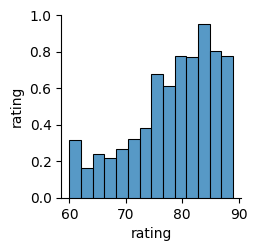

In [ ]:
sns.pairplot(cell)

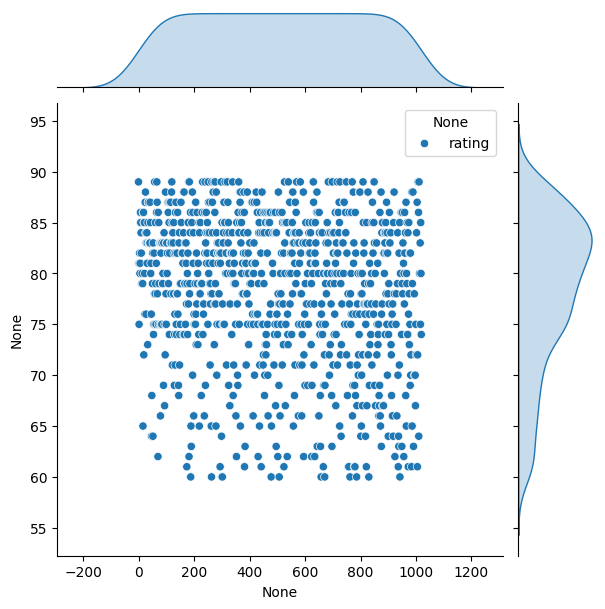

In [ ]:
sns.jointplot(cell)

In [ ]:
cell['rating'].min()

60.0

In [ ]:
cell['os'].value_counts()

os
Android v12                           287
Android v11                           233
No FM Radio                           192
Android v10                            58
Android v13                            45
Bluetooth                              38
Android v9.0 (Pie)                     27
Android v10.0                          22
iOS v16                                14
iOS v15                                10
Android v8.1 (Oreo)                    10
Memory Card Not Supported               6
Android v11.0                           4
Browser                                 4
Android v8.0 (Oreo)                     4
iOS v13                                 3
Android v6.0 (Marshmallow)              3
iOS v15.0                               3
Memory Card Supported, upto 32 GB       3
Android v5.1.1 (Lollipop)               2
Memory Card (Hybrid), upto 2 TB         2
Harmony v2.0                            2
Memory Card Supported, upto 64 GB       2
Memory Card (Hybrid), upto 256 

In [ ]:
cell['model'].value_counts()

model
OnePlus 11 5G                           1
Xiaomi Qin 1                            1
Realme C25Y (4GB RAM + 64GB)            1
Samsung Galaxy A12 (6GB RAM + 128GB)    1
Tecno Camon 19                          1
                                       ..
POCO M4 Pro 4G (6GB RAM + 128GB)        1
OnePlus Nord N20 5G                     1
Apple iPhone 13 (256GB)                 1
Oppo Find X6 Pro                        1
Samsung Galaxy M52s 5G                  1
Name: count, Length: 1020, dtype: int64

In [ ]:
import re

In [ ]:
def obtener_marca(nombre_modelo):
    patron = r'^\w+'  
    match = re.match(patron, str(nombre_modelo))
    if match:
        return match.group(0)
    else:
        return "Sin marca"

cell['marca'] = cell['model'].apply(obtener_marca)
frecuencia_marcas = cell['marca'].value_counts()

In [ ]:
cell['marca'].value_counts()

marca
Xiaomi       135
Samsung      135
Vivo         111
Realme        97
OPPO          62
Motorola      53
Apple         47
OnePlus       42
Tecno         33
iQOO          32
Nokia         30
Infinix       29
Poco          28
Oppo          26
Huawei        16
Google        14
POCO          13
Honor         13
itel          11
Sony           9
Asus           7
Nubia          6
Jio            5
Nothing        5
LG             4
iKall          4
Lava           4
Eunity         3
Micromax       3
Itel           3
Lyf            3
Oukitel        3
Redmi          3
Gionee         3
Letv           3
Doogee         2
Lenovo         2
ZTE            2
Royole         2
LeEco          1
CAT            1
Blackview      1
Sharp          1
TCL            1
BLU            1
BlackZone      1
DIZO           1
Leitz          1
Duoqin         1
Karbonn        1
Zanco          1
Vertu          1
Tesla          1
Namotel        1
Cola           1
XTouch         1
Name: count, dtype: int64

In [ ]:
grouped = cell.groupby(['marca', 'os'])

In [ ]:
cell[cell['marca'] == 'Samsung']['os'].value_counts()

os
Android v12                  55
Android v11                  28
Android v10                  10
Android v13                   8
Bluetooth                     7
No FM Radio                   7
Android v9.0 (Pie)            7
Android v10.0                 6
Memory Card Not Supported     2
Android v8.0 (Oreo)           2
Name: count, dtype: int64

In [ ]:
new_filas_nan = cell[cell.isnull().any(axis=1)]

In [ ]:
new_filas_nan['rating'].fillna(78.258, inplace=True)

C:\Users\taylo\AppData\Local\Temp\ipykernel_6516\289696971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_filas_nan['rating'].fillna(78.258, inplace=True)


In [ ]:
new_filas_nan[new_filas_nan.isnull().any(axis=1)]

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,marca
473,Nokia 110 4G,"₹1,762",78.258,"Dual Sim, 3G, 4G, VoLTE",No Wifi,"128 MB RAM, 48 MB inbuilt",1020 mAh Battery,"1.8 inches, 120 x 160 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",NaN,Nokia
532,Samsung Guru Music 2 Dual Sim,"₹1,949",78.258,Dual Sim,No Wifi,"Single Core, 208 MHz Processor",800 mAh Battery,"2 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 16 GB",NaN,Samsung
573,Nokia 105 (2019),"₹1,299",78.258,Single Sim,No Wifi,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 120 x 160 px Display",No Rear Camera,NaN,NaN,Nokia
608,Namotel Achhe Din,₹99,78.258,"Dual Sim, 3G, Wi-Fi","1 GB RAM, 4 GB inbuilt",1325 mAh Battery,"4 inches, 720 x 1280 px Display",2 MP Rear & 0.3 MP Front Camera,Android v5.0 (Lollipop),Bluetooth,NaN,Namotel
640,Nokia 105 Plus,"₹1,299",78.258,Dual Sim,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN,Nokia
645,Nokia 2760 Flip,"₹5,490",78.258,"Dual Sim, 3G, 4G, Wi-Fi",1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0,Bluetooth,NaN,Nokia
647,Motorola Moto A10,"₹1,339",78.258,Dual Sim,"4 MB RAM, 4 MB inbuilt",1750 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",NaN,NaN,Motorola
657,Zanco Tiny T1,"₹2,799",78.258,Single Sim,"32 MB RAM, 32 MB inbuilt",200 mAh Battery,"0.49 inches, 64 x 32 px Display",No Rear Camera,No FM Radio,Bluetooth,NaN,Zanco
665,itel it2163S,₹958,78.258,Dual Sim,"4 MB RAM, 4 MB inbuilt",1200 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN,itel
699,Samsung Guru GT-E1215,"₹1,850",78.258,Single Sim,800 mAh Battery,"1.5 inches, 120 x 120 px Display",No Rear Camera,No FM Radio,NaN,NaN,NaN,Samsung


In [ ]:
cell['marca'].value_counts()

marca
Xiaomi       135
Samsung      135
Vivo         111
Realme        97
OPPO          62
Motorola      53
Apple         47
OnePlus       42
Tecno         33
iQOO          32
Nokia         30
Infinix       29
Poco          28
Oppo          26
Huawei        16
Google        14
POCO          13
Honor         13
itel          11
Sony           9
Asus           7
Nubia          6
Jio            5
Nothing        5
LG             4
iKall          4
Lava           4
Eunity         3
Micromax       3
Itel           3
Lyf            3
Oukitel        3
Redmi          3
Gionee         3
Letv           3
Doogee         2
Lenovo         2
ZTE            2
Royole         2
LeEco          1
CAT            1
Blackview      1
Sharp          1
TCL            1
BLU            1
BlackZone      1
DIZO           1
Leitz          1
Duoqin         1
Karbonn        1
Zanco          1
Vertu          1
Tesla          1
Namotel        1
Cola           1
XTouch         1
Name: count, dtype: int64

In [ ]:
new_filas_nan['marca'].value_counts()

marca
Nokia        20
Samsung      19
Vivo         15
itel         10
Xiaomi       10
Oppo          6
Huawei        5
Motorola      5
Realme        5
OnePlus       4
Jio           4
Eunity        3
Itel          3
Apple         3
Tecno         2
LG            2
Lyf           2
Honor         2
Sony          2
Google        2
Letv          2
Gionee        2
iKall         1
Karbonn       1
BlackZone     1
XTouch        1
DIZO          1
CAT           1
Infinix       1
Asus          1
Zanco         1
Namotel       1
Poco          1
Duoqin        1
Lava          1
Name: count, dtype: int64

In [ ]:
cell[cell['marca'] == 'Xiaomi']['os'].value_counts()

os
Android v11                   53
No FM Radio                   30
Android v12                   21
Android v10                    9
Android v10.0                  8
Bluetooth                      4
Android v13                    4
Android v9.0 (Pie)             3
Android v8.1 (Oreo)            2
Android v6.0 (Marshmallow)     1
Name: count, dtype: int64

In [ ]:
cell[cell['marca'] == 'itel']['os'].value_counts()

os
Android v10                          2
Memory Card Supported, upto 64 GB    2
Android v11.0                        2
Bluetooth                            1
Android v9.0 (Pie)                   1
Android v9 (Pie)                     1
No FM Radio                          1
Name: count, dtype: int64

In [ ]:
cell[cell['marca'] == 'Vivo']['os'].value_counts()

os
Android v12                   50
Android v11                   18
No FM Radio                   14
Android v9.0 (Pie)             9
Android v13                    8
Android v8.1 (Oreo)            5
Bluetooth                      2
Android v10.0                  2
Android v5.1 (Lollipop)        1
Android v10                    1
Android v6.0 (Marshmallow)     1
Name: count, dtype: int64

In [ ]:
cell[cell['marca'] == 'Samsung']['os'].value_counts()

os
Android v12                  55
Android v11                  28
Android v10                  10
Android v13                   8
Bluetooth                     7
No FM Radio                   7
Android v9.0 (Pie)            7
Android v10.0                 6
Memory Card Not Supported     2
Android v8.0 (Oreo)           2
Name: count, dtype: int64

In [ ]:
cell[cell['marca'] == 'Nokia']['os'].value_counts()

os
Android v11                          7
Android v12                          4
Memory Card Supported, upto 32 GB    3
Bluetooth                            2
RTOS (Series 30+)                    2
Browser                              2
Android v12.1                        1
Memory Card Supported                1
0.3 MP Rear Camera                   1
Harmony v2.0                         1
Name: count, dtype: int64

In [ ]:
sistema_operativo_comun_por_marca = cell[cell['os'].notnull()].groupby('marca')['os'].agg(lambda x: x.value_counts().idxmax())

for marca, sistema_operativo in sistema_operativo_comun_por_marca.items():
    filas_con_nan_y_marca = new_filas_nan[(new_filas_nan['os'].isnull()) & (new_filas_nan['marca'] == marca)]
    new_filas_nan.loc[filas_con_nan_y_marca.index, 'os'] = sistema_operativo

In [ ]:
sistema_operativo

'Android v10'

In [ ]:
sistema_operativo_comun_por_marca

marca
Apple                                   iOS v16
Asus                                Android v12
BLU                                 Android v11
BlackZone                             Bluetooth
Blackview                           Android v12
CAT          Memory Card Supported, upto 128 GB
Cola                                Android v12
DIZO                                  Bluetooth
Doogee                              Android v12
Duoqin                              Android v12
Eunity        Memory Card Supported, upto 16 GB
Gionee                              Android v10
Google                              No FM Radio
Honor                               No FM Radio
Huawei        Memory Card (Hybrid), upto 256 GB
Infinix                             Android v12
Itel                                Android v12
Jio                                 Android v12
LG              Memory Card (Hybrid), upto 2 TB
Lava                                Android v12
LeEco                             

In [ ]:
for i in new_filas_nan:
    new_filas_nan['os'].fillna(sistema_operativo_comun_por_marca)

In [ ]:
for i in new_filas_nan:
    new_filas_nan['os'].fillna('Android v11', inplace=True)

C:\Users\taylo\AppData\Local\Temp\ipykernel_6516\4071328458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_filas_nan['os'].fillna('Android v11', inplace=True)


In [ ]:
new_filas_nan[new_filas_nan.isnull().any(axis=1)]

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,marca
573,Nokia 105 (2019),"₹1,299",78.258,Single Sim,No Wifi,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 120 x 160 px Display",No Rear Camera,NaN,Android v11,Nokia
647,Motorola Moto A10,"₹1,339",78.258,Dual Sim,"4 MB RAM, 4 MB inbuilt",1750 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",NaN,Android v12,Motorola
699,Samsung Guru GT-E1215,"₹1,850",78.258,Single Sim,800 mAh Battery,"1.5 inches, 120 x 120 px Display",No Rear Camera,No FM Radio,NaN,NaN,Android v12,Samsung
835,Eunity U1 King,₹599,78.258,Dual Sim,1.77 MHz Processor,"32 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 260 x 240 px Display",0.3 MP Rear Camera,NaN,"Memory Card Supported, upto 16 GB",Eunity
881,Nokia 110 (2022),"₹1,599",78.258,Dual Sim,No Wifi,"4 MB RAM, 4 MB inbuilt",1000 mAh Battery,"1.77 inches, 120 x 160 px Display","Memory Card Supported, upto 32 GB",NaN,Android v11,Nokia
927,Samsung Guru E1200,"₹1,685",78.258,Single Sim,No Wifi,800 mAh Battery,"1.5 inches, 128 x 128 px Display",No Rear Camera,No FM Radio,NaN,Android v12,Samsung
932,Eunity U1 Livo,₹649,78.258,Dual Sim,1.77 MHz Processor,"16 MB RAM, 16 MB inbuilt",1000 mAh Battery,"1.8 inches, 280 x 240 px Display",0.3 MP Rear Camera,NaN,"Memory Card Supported, upto 16 GB",Eunity


In [ ]:
new_filas_nan

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,marca
14,Samsung Galaxy S23 Ultra 5G,"₹1,14,990",78.258,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.8 inches, 1440 x 3088 px, 120 Hz Display wit...",200 MP Quad Rear & 12 MP Front Camera,Memory Card Not Supported,Android v13,Samsung
29,OnePlus 11 Pro,"₹69,999",78.258,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Android v13,No FM Radio,OnePlus
37,Samsung Galaxy S22 Ultra 5G,"₹91,999",78.258,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.8 inches, 1440 x 3080 px, 120 Hz Display wit...",108 MP Quad Rear & 40 MP Front Camera,Android v12,Bluetooth,Samsung
49,Samsung Galaxy A74 5G,"₹42,999",78.258,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 7 Gen1, Octa Core, 2.36 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP Quad Rear & 32 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v12,Samsung
69,Oppo Find N Fold,"₹99,990",78.258,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",64 MP + 10 MP + 8 MP Triple Rear & 32 MP Front...,Android v12,Oppo
...,...,...,...,...,...,...,...,...,...,...,...,...
996,Vivo Y55S,"₹13,490",78.258,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 425, Quad Core, 1.2 GHz Processor","3 GB RAM, 16 GB inbuilt",2730 mAh Battery,"5.2 inches, 720 x 1280 px Display",13 MP Rear & 5 MP Front Camera,Memory Card Supported,Android v6.0 (Marshmallow),Vivo
1000,XTouch F40 Flip,"₹1,999",78.258,Dual Sim,No 3G,No Wifi,"32 MB RAM, 32 MB inbuilt",800 mAh Battery,"1.77 inches, 240 x 320 px Display",Dual Display,1.3 MP Rear Camera,XTouch
1003,Lava X3,"₹6,999",78.258,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio A22, Quad Core, 2 GHz Processor","3 GB RAM, 32 GB inbuilt",4000 mAh Battery,"6.5 inches, 1600 x 720 px Display with Water D...",8 MP Dual Rear & 5 MP Front Camera,"Memory Card (Hybrid), upto 512 GB",Android v12,Lava
1012,itel A23s,"₹4,787",78.258,"Dual Sim, 3G, 4G, Wi-Fi","Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor","2 GB RAM, 32 GB inbuilt",3020 mAh Battery,"5 inches, 854 x 480 px Display",2 MP Rear Camera,Android v11,No FM Radio,itel


In [ ]:
cell.iloc[573]

model                         Nokia 105 (2019)
price                                   ₹1,299
rating                                     NaN
sim                                 Single Sim
processor                              No Wifi
ram                     4 MB RAM, 4 MB inbuilt
battery                        800 mAh Battery
display      1.77 inches, 120 x 160 px Display
camera                          No Rear Camera
card                                       NaN
os                                         NaN
marca                                    Nokia
Name: 573, dtype: object

In [ ]:
cell['rating'].head(20).sort_values(ascending=False)

0     89.0
7     86.0
18    86.0
17    86.0
8     85.0
9     84.0
4     82.0
10    82.0
6     81.0
1     81.0
3     81.0
5     80.0
13    80.0
11    79.0
12    79.0
15    79.0
2     75.0
19    72.0
16    65.0
14     NaN
Name: rating, dtype: float64

In [ ]:
cell['rating'].m()

78.25824800910125

In [ ]:
cell['os'].value_counts()

os
Android v12                           287
Android v11                           233
No FM Radio                           192
Android v10                            58
Android v13                            45
Bluetooth                              38
Android v9.0 (Pie)                     27
Android v10.0                          22
iOS v16                                14
iOS v15                                10
Android v8.1 (Oreo)                    10
Memory Card Not Supported               6
Android v11.0                           4
Browser                                 4
Android v8.0 (Oreo)                     4
iOS v13                                 3
Android v6.0 (Marshmallow)              3
iOS v15.0                               3
Memory Card Supported, upto 32 GB       3
Android v5.1.1 (Lollipop)               2
Memory Card (Hybrid), upto 2 TB         2
Harmony v2.0                            2
Memory Card Supported, upto 64 GB       2
Memory Card (Hybrid), upto 256 

In [ ]:
cell['card'].value_counts()

card
Memory Card Supported, upto 1 TB                          171
Memory Card Not Supported                                 112
Android v12                                               107
Memory Card Supported, upto 512 GB                        105
Memory Card (Hybrid), upto 1 TB                            91
                                                         ... 
Memory Card Supported, upto 16 GB                           1
50 MP Quad Rear & 16 MP + 16 MP Dual Front Camera           1
2 MP Rear Camera                                            1
Android v12.1                                               1
50 MP + 50 MP + 10 MP Triple Rear & 32 MP Front Camera      1
Name: count, Length: 63, dtype: int64

In [ ]:
cell.groupby(['model', 'price']).head().sort_values(by='price')

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,marca
908,Samsung Galaxy S21 Ultra 5G (12GB RAM + 128GB),"₹1,01,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Exynos 2100, Octa Core, 2.9 GHz Processor","12 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.8 inches, 1440 x 3200 px, 120 Hz Display wit...",108 MP Quad Rear & 40 MP Front Camera,Android v10,No FM Radio,Samsung
813,Apple iPhone 14 Plus (512GB),"₹1,04,999",83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor","6 GB RAM, 512 GB inbuilt",4325 mAh Battery with Fast Charging,"6.7 inches, 1284 x 2778 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v16,Apple
404,Samsung Galaxy Note 30 Ultra 5G,"₹1,04,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"6.71 inches, 1440 x 3214 px, 120 Hz Display wi...",200 MP + 12 MP + 12 MP Triple Rear & 10 MP Fro...,"Memory Card (Hybrid), upto 1 TB",Android v12,Samsung
328,Samsung Galaxy S21 Ultra,"₹1,05,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Exynos 2100, Octa Core, 2.9 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.8 inches, 1440 x 3200 px, 120 Hz Display wit...",108 MP Quad Rear & 40 MP Front Camera,Android v10,No FM Radio,Samsung
98,Vivo X Fold 5G,"₹1,06,990",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12,Vivo
...,...,...,...,...,...,...,...,...,...,...,...,...
641,Samsung Galaxy S22 Ultra 5G (8GB RAM + 128GB),"₹99,990",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.8 inches, 1440 x 3080 px, 120 Hz Display wit...",108 MP Quad Rear & 40 MP Front Camera,Android v12,Bluetooth,Samsung
724,Huawei Mate 50 Pro 5G,"₹99,990",85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Kirin 9000E, Octa Core, 3.13 GHz Processor","8 GB RAM, 256 GB inbuilt",4500 mAh Battery with 66W Fast Charging,"6.76 inches, 1440 x 3200 px, 120 Hz Display wi...",64 MP + 50 MP + 13 MP Triple Rear & 13 MP Fron...,Memory Card Not Supported,Hongmeng OS v4.0,Huawei
69,Oppo Find N Fold,"₹99,990",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",64 MP + 10 MP + 8 MP Triple Rear & 32 MP Front...,Android v12,Oppo
605,Samsung Galaxy S20 Ultra 5G,"₹99,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Exynos 990, Octa Core, 2.73 GHz Processor","12 GB RAM, 128 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.9 inches, 1440 x 3200 px Display with Punch ...",108 MP Quad Rear & 40 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v10.0,Samsung


In [ ]:
filas_nan

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
14,Samsung Galaxy S23 Ultra 5G,"₹1,14,990",78.258,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.8 inches, 1440 x 3088 px, 120 Hz Display wit...",200 MP Quad Rear & 12 MP Front Camera,Memory Card Not Supported,Android v13
29,OnePlus 11 Pro,"₹69,999",78.258,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Android v13,No FM Radio
37,Samsung Galaxy S22 Ultra 5G,"₹91,999",78.258,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.8 inches, 1440 x 3080 px, 120 Hz Display wit...",108 MP Quad Rear & 40 MP Front Camera,Android v12,Bluetooth
49,Samsung Galaxy A74 5G,"₹42,999",78.258,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 7 Gen1, Octa Core, 2.36 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP Quad Rear & 32 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v12
69,Oppo Find N Fold,"₹99,990",78.258,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",64 MP + 10 MP + 8 MP Triple Rear & 32 MP Front...,Android v12
...,...,...,...,...,...,...,...,...,...,...,...
996,Vivo Y55S,"₹13,490",78.258,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 425, Quad Core, 1.2 GHz Processor","3 GB RAM, 16 GB inbuilt",2730 mAh Battery,"5.2 inches, 720 x 1280 px Display",13 MP Rear & 5 MP Front Camera,Memory Card Supported,Android v6.0 (Marshmallow)
1000,XTouch F40 Flip,"₹1,999",78.258,Dual Sim,No 3G,No Wifi,"32 MB RAM, 32 MB inbuilt",800 mAh Battery,"1.77 inches, 240 x 320 px Display",Dual Display,1.3 MP Rear Camera
1003,Lava X3,"₹6,999",78.258,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio A22, Quad Core, 2 GHz Processor","3 GB RAM, 32 GB inbuilt",4000 mAh Battery,"6.5 inches, 1600 x 720 px Display with Water D...",8 MP Dual Rear & 5 MP Front Camera,"Memory Card (Hybrid), upto 512 GB",Android v12
1012,itel A23s,"₹4,787",78.258,"Dual Sim, 3G, 4G, Wi-Fi","Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor","2 GB RAM, 32 GB inbuilt",3020 mAh Battery,"5 inches, 854 x 480 px Display",2 MP Rear Camera,Android v11,No FM Radio


In [ ]:
filas_nan.loc[filas_nan['model'] == 'Samsung Galaxy S22 Ultra 5G', 'card'] = 'PRUEBA'

In [ ]:
filas_nan

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,"(49, card)"
14,Samsung Galaxy S23 Ultra 5G,"₹1,14,990",78.258,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.8 inches, 1440 x 3088 px, 120 Hz Display wit...",200 MP Quad Rear & 12 MP Front Camera,Memory Card Not Supported,Android v13,HOLA
29,OnePlus 11 Pro,"₹69,999",78.258,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Android v13,No FM Radio,HOLA
37,Samsung Galaxy S22 Ultra 5G,"₹91,999",78.258,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.8 inches, 1440 x 3080 px, 120 Hz Display wit...",108 MP Quad Rear & 40 MP Front Camera,PRUEBA,Bluetooth,HOLA
49,Samsung Galaxy A74 5G,"₹42,999",78.258,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 7 Gen1, Octa Core, 2.36 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP Quad Rear & 32 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v12,HOLA
69,Oppo Find N Fold,"₹99,990",78.258,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",64 MP + 10 MP + 8 MP Triple Rear & 32 MP Front...,Android v12,HOLA
...,...,...,...,...,...,...,...,...,...,...,...,...
996,Vivo Y55S,"₹13,490",78.258,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 425, Quad Core, 1.2 GHz Processor","3 GB RAM, 16 GB inbuilt",2730 mAh Battery,"5.2 inches, 720 x 1280 px Display",13 MP Rear & 5 MP Front Camera,Memory Card Supported,Android v6.0 (Marshmallow),HOLA
1000,XTouch F40 Flip,"₹1,999",78.258,Dual Sim,No 3G,No Wifi,"32 MB RAM, 32 MB inbuilt",800 mAh Battery,"1.77 inches, 240 x 320 px Display",Dual Display,1.3 MP Rear Camera,HOLA
1003,Lava X3,"₹6,999",78.258,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio A22, Quad Core, 2 GHz Processor","3 GB RAM, 32 GB inbuilt",4000 mAh Battery,"6.5 inches, 1600 x 720 px Display with Water D...",8 MP Dual Rear & 5 MP Front Camera,"Memory Card (Hybrid), upto 512 GB",Android v12,HOLA
1012,itel A23s,"₹4,787",78.258,"Dual Sim, 3G, 4G, Wi-Fi","Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor","2 GB RAM, 32 GB inbuilt",3020 mAh Battery,"5 inches, 854 x 480 px Display",2 MP Rear Camera,Android v11,No FM Radio,HOLA


In [ ]:
patron1 = r'(\d)\.(\d{2})\.(\d{3})'
cleancell['price'] = cleancell['price'].str.replace(patron1, r'\1\.\2\.\3')



cleancell['price'] = cleancell['price'].astype(int)

In [27]:
cell

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...
1015,Motorola Moto Edge S30 Pro,"₹34,990",83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio
1016,Honor X8 5G,"₹14,990",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,POCO X4 GT 5G (8GB RAM + 256GB),"₹28,990",85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,Motorola Moto G91 5G,"₹19,990",80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


In [ ]:
from fuzzywuzzy import fuzz
import Levenshtein

columna_analizar = 'display'

umbral = 70

for index, row in cell.iterrows():
    valor_actual = str(row[columna_analizar])
    similitudes = cell[cell.index != index][columna_analizar].apply(lambda x: fuzz.token_set_ratio(str(x), valor_actual))
    
    if any(similitudes < umbral):
        print(f"Valor {valor_actual} en '{columna_analizar}' de la fila {index} difiere significativamente en algunas filas")




In [77]:
patron_sim = r'(?i)(?=.*\b(Sim)\b)'

filas_erroneas_sim = cell[~cell['sim'].str.match(patron_sim, case=False)]
pd.DataFrame(filas_erroneas_sim)

11

In [67]:
patron_processor = r'(?i)(?=.*\b(GHz|Processor|Snapdragon|Bionic|Apple)\b)'

filas_erroneas_processor = cell[~cell['processor'].str.match(patron_processor, case=False)]
pd.DataFrame(filas_erroneas_processor)

330

In [66]:
patron_ram = r'(?i)(?=.*\b(RAM|inbuilt)\b)'

filas_erroneas_ram = cell[~cell['ram'].str.match(patron_ram, case=False)]
pd.DataFrame(filas_erroneas_ram)

253

In [79]:
patron_battery = r'(?i)(?=.*\b(mAh|Battery)\b)'

filas_erroneas_battery = cell[~cell['battery'].str.match(patron_battery, case=False)]
pd.DataFrame(filas_erroneas_battery)

363

In [ ]:
patron_display = r'(?i)(?=.*\b(inches|px)\b)'

filas_erroneas_display = cell[~cell['display'].str.match(patron_display, case=False)]
pd.DataFrame(filas_erroneas_display)

In [ ]:
patron_camera = r'(?i)(?=.*\b(MP|Camera)\b)'

filas_erroneas_camera = cell[~cell['camera'].str.match(patron_camera, case=False)]
pd.DataFrame(filas_erroneas_camera)

In [ ]:
patron_card = r'(?i)(?=.*\b(Memory|Card|Supported|upto|TB)\b)'

filas_erroneas_card = cell[~cell['card'].str.match(patron_card, case=False)]
pd.DataFrame(filas_erroneas_card)

In [ ]:
patron_os = r'(?i)(?=.*\b(Android|iOS|Harmony|HarmonyOS|OS|RTOS|EMUI)\b)'

filas_erroneas_os = cell[~cell['os'].str.match(patron_os, case=False)]
pd.DataFrame(filas_erroneas_os)

In [ ]:
patron_sim = r'(?i)(?=.*\b(Sim)\b)'
patron_processor = r'(?i)(?=.*\b(GHz|Processor|Snapdragon|Bionic|Apple)\b)'
patron_ram = r'(?i)(?=.*\b(RAM|inbuilt)\b)'
patron_battery = r'(?i)(?=.*\b(mAh|Battery)\b)'
patron_display = r'(?i)(?=.*\b(inches|px)\b)'
patron_camera = r'(?i)(?=.*\b(MP|Camera)\b)'
patron_card = r'(?i)(?=.*\b(Memory|Card|Supported|upto|TB)\b)'
patron_os = r'(?i)(?=.*\b(Android|iOS|Harmony|HarmonyOS|OS|RTOS|EMUI)\b)'

filas_erroneas_cell_prueba = cell[
    (~cell['sim'].str.match(patron_sim, case=False)) |
    (~cell['processor'].str.match(patron_processor, case=False)) |
    (~cell['ram'].str.match(patron_ram, case=False)) 
    (~cell['battery'].str.match(patron_battery, case=False))
    (~cell['display'].str.match(patron_display, case=False))
    (~cell['camera'].str.match(patron_camera, case=False))
    (~cell['card'].str.match(patron_card, case=False))
    (~cell['os'].str.match(patron_os, case=False))
    ]
pd.DataFrame(filas_erroneas_cell_prueba)


In [83]:
cell['os'].unique()

array(['Android v13', 'Android v12', 'iOS v16', 'No FM Radio', 'iOS v15',
       'Bluetooth', 'Android v11', 'Android v10', 'iOS v13',
       'HarmonyOS v2', 'iOS v15.0', 'Android v10.0',
       'Android v8.1 (Oreo)', 'Memory Card Supported, upto 32\u2009GB',
       'Memory Card Not Supported', 'iOS v13.0', 'Android v11.0',
       'Android v9.0 (Pie)', 'Android v12.1', 'iOS v12.3',
       'Memory Card Supported', 'Memory Card Supported, upto 256\u2009GB',
       '0.3\u2009MP Rear Camera', 'KAI OS', 'iOS v17',
       'Android v4.4.2 (KitKat)', nan, 'Android v5.1 (Lollipop)',
       'Android v5.1.1 (Lollipop)', 'Hongmeng OS v3.0',
       'Android v8.0 (Oreo)', 'Memory Card Supported, upto 64\u2009GB',
       'Memory Card (Hybrid), upto 2\u2009TB',
       'Android v6.0 (Marshmallow)', 'Pragati OS (Powered by Android)',
       'Memory Card Supported, upto 16\u2009GB', 'Memory Card (Hybrid)',
       'RTOS (Series 30+)', 'Harmony v2.0', 'Hongmeng OS v4.0',
       'Memory Card (Hybrid), upto 

In [491]:
filasbad = pd.read_csv('../../src/data/process/filas_erroneas_cleancell.csv')

In [641]:
filasbad

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,brand,ram_GB,battery_mAh,MP_rearcamera,MP_frontcamera,pulgadas
0,Nothing Phone 1,26749,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,"Memory Card Supported, upto 32GB",Android v12,Nothing,8.0,4500.0,50.0,16.0,6.55
1,OnePlus Nord 2T 5G,28999,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,"Memory Card Supported, upto 32GB",Android v12,OnePlus,8.0,4500.0,50.0,32.0,6.43
2,Xiaomi Redmi Note 12 Pro 5G,24762,79.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card Supported, upto 32GB",Android v12,Xiaomi,6.0,5000.0,50.0,16.0,6.67
3,OPPO Reno 9 Pro Plus,45999,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","16 GB RAM, 256 GB inbuilt",4700 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,"Memory Card Supported, upto 32GB",Android v13,OPPO,16.0,4700.0,50.0,32.0,6.70
4,OnePlus 10R 5G,32999,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 8100 Max, Octa Core, 2.85 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card Supported, upto 32GB",Android v12,OnePlus,8.0,5000.0,50.0,16.0,6.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,Oppo Find X6,69990,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",4700 mAh Battery with 120W Fast Charging,"6.73 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP Fron...,Memory Card Not Supported,Android v12,Oppo,8.0,4700.0,50.0,32.0,6.73
282,itel A23s,4787,78.0,"Dual Sim, 3G, 4G, Wi-Fi","Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor","2 GB RAM, 32 GB inbuilt",3020 mAh Battery,"5 inches, 854 x 480 px Display",2 MP Rear Camera,"Memory Card Supported, upto 32GB",Android v11,itel,2.0,3020.0,2.0,0.0,5.00
283,Google Pixel 8 Pro,70990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Google Tensor 3, Octa Core Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.73 inches, 1440 x 3120 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,Android v13,Google,12.0,5000.0,50.0,12.0,6.73
284,Vivo X Fold 2,119990,78.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4800 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",50 MP + 50 MP + 10 MP Triple Rear & 32 MP Fron...,Memory Card Not Supported,Android v12,Vivo,12.0,4800.0,50.0,32.0,8.03


In [94]:
import re

In [95]:
columnas_a_procesar = ['sim', 'processor', 'ram', 'battery', 'display', 'camera', 'card', 'os']

patrones = {
    'sim': r'(?i)(?=.*\b(Sim)\b)',
    'processor': r'(?i)(?=.*\b(GHz|Processor|Snapdragon|Bionic|Apple)\b)',
    'ram': r'(?i)(?=.*\b(RAM|inbuilt)\b)',
    'battery': r'(?i)(?=.*\b(mAh|Battery)\b)',
    'display': r'(?i)(?=.*\b(inches|px)\b)',
    'camera': r'(?i)(?=.*\b(MP|Camera)\b)',
    'card': r'(?i)(?=.*\b(Memory|Card|Supported|upto|TB)\b)',
    'os': r'(?i)(?=.*\b(Android|iOS|Harmony|HarmonyOS|OS|RTOS|EMUI)\b)'
}

for indice, fila in filasbad.iterrows():
    for columna_actual in columnas_a_procesar:
        patron_columna_actual = patrones[columna_actual]
        valor_actual = fila[columna_actual]

        if not pd.isnull(valor_actual) and not re.search(patron_columna_actual, str(valor_actual), re.IGNORECASE):
            for otra_columna in columnas_a_procesar:
                if otra_columna != columna_actual:
                    patron_otra_columna = patrones[otra_columna]
                    valor_otra_columna = fila[otra_columna]

                    if not pd.isnull(valor_otra_columna) and re.search(patron_otra_columna, str(valor_otra_columna), re.IGNORECASE):
                        filasbad.at[indice, columna_actual] = valor_otra_columna
                        filasbad.at[indice, otra_columna] = np.nan

In [101]:
columnas_a_procesar = ['sim', 'processor', 'ram', 'battery', 'display', 'camera', 'card', 'os']

patrones = {
    'sim': r'(?i)(?=.*\b(Sim)\b)',
    'processor': r'(?i)(?=.*\b(GHz|Processor|Snapdragon|Bionic|Apple)\b)',
    'ram': r'(?i)(?=.*\b(RAM|inbuilt)\b)',
    'battery': r'(?i)(?=.*\b(mAh|Battery)\b)',
    'display': r'(?i)(?=.*\b(inches|px)\b)',
    'camera': r'(?i)(?=.*\b(MP|Camera)\b)',
    'card': r'(?i)(?=.*\b(Memory|Card|Supported|upto|TB)\b)',
    'os': r'(?i)(?=.*\b(Android|iOS|Harmony|HarmonyOS|OS|RTOS|EMUI)\b)'
}

for indice, fila in filasbad.iterrows():
    for columna_actual in columnas_a_procesar:
        patron_columna_actual = patrones[columna_actual]
        valor_actual = fila[columna_actual]

        if not pd.isnull(valor_actual) and not re.search(patron_columna_actual, str(valor_actual), re.IGNORECASE):
            for otra_columna in columnas_a_procesar:
                if otra_columna != columna_actual:
                    patron_otra_columna = patrones[otra_columna]
                    valor_otra_columna = fila[otra_columna]

                    if (
                        not pd.isnull(valor_otra_columna) and
                        re.search(patron_otra_columna, str(valor_otra_columna), re.IGNORECASE) and
                        valor_otra_columna != valor_actual
                    ):
                        filasbad.at[indice, columna_actual] = valor_otra_columna
                        filasbad.at[indice, otra_columna] = np.nan

In [105]:
filasbad

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,brand
0,Nothing Phone 1,26749,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,Android v12,No FM Radio,Nothing
1,OnePlus Nord 2T 5G,28999,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Android v12,No FM Radio,OnePlus
2,Xiaomi Redmi Note 12 Pro 5G,24762,79.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio,Xiaomi
3,OPPO Reno 9 Pro Plus,45999,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","16 GB RAM, 256 GB inbuilt",4700 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Android v13,No FM Radio,OPPO
4,OnePlus 10R 5G,32999,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 8100 Max, Octa Core, 2.85 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,Bluetooth,OnePlus
...,...,...,...,...,...,...,...,...,...,...,...,...
281,Oppo Find X6,69990,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",4700 mAh Battery with 120W Fast Charging,"6.73 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP Fron...,Android v12,No FM Radio,Oppo
282,itel A23s,4787,78.0,"Dual Sim, 3G, 4G, Wi-Fi","Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor","2 GB RAM, 32 GB inbuilt",3020 mAh Battery,"5 inches, 854 x 480 px Display",2 MP Rear Camera,Android v11,No FM Radio,itel
283,Google Pixel 8 Pro,70990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Google Tensor 3, Octa Core Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.73 inches, 1440 x 3120 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 12 MP Fron...,Android v13,No FM Radio,Google
284,Vivo X Fold 2,119990,78.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4800 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP + 50 MP + 10 MP Triple Rear & 32 MP Fron...,Android v12,Vivo


In [108]:
patron_sim = r'(?i)(?=.*\b(Sim)\b)'

filas_erroneas_sim2 = filasbad[~filasbad['sim'].str.match(patron_sim, case=False)]
pd.DataFrame(filas_erroneas_sim2)

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,brand
205,Apple iPod Touch (7th Gen),18900,78.0,Wi-Fi,32 GB inbuilt,"4 inches, 640 x 1136 px Display",8 MP Rear & 1.2 MP Front Camera,iOS v12,No FM Radio,Bluetooth,Browser,Apple


In [111]:
filasbad.drop(205, axis=0, inplace=True)

In [211]:
patrones = {
    'sim': r'(?i)(?=.*\b(Sim)\b)',
    'processor': r'(?i)(?=.*\b(GHz|Processor|Snapdragon|Bionic|Apple)\b)',
    'ram': r'(?i)(?=.*\b(RAM|inbuilt)\b)',
    'battery': r'(?i)(?=.*\b(mAh|Battery)\b)',
    'display': r'(?i)(?=.*\b(inches|px)\b)',
    'camera': r'(?i)(?=.*\b(MP|Camera)\b)',
    'card': r'(?i)(?=.*\b(Memory|Card|Supported|upto|TB)\b)',
    'os': r'(?i)(?=.*\b(Android|iOS|Harmony|HarmonyOS|OS|RTOS|EMUI)\b)'
}

errores_por_columna = {columna: [] for columna in patrones}

def detectar_errores(fila):
    for columna, patron in patrones.items():
        valor_actual = fila[columna]
        print(f"Fila actual: {fila.name}, Columna: {columna}, Valor: {valor_actual}")
        if not pd.isnull(valor_actual) and not re.search(patron, str(valor_actual), re.IGNORECASE):
            errores_por_columna[columna].append(fila)

filasbad.apply(detectar_errores, axis=1)

dfs_errores_por_columna = {columna: pd.DataFrame(filas, columns=filasbad.columns) for columna, filas in errores_por_columna.items()}

for columna, df_errores in dfs_errores_por_columna.items():
    print(f'Errores en la columna {columna}:')
    print(df_errores)

In [216]:
patron_sim2 = r'(?i)(?=.*\b(Sim)\b)'
patron_processor2 = r'(?i)(?=.*\b(GHz|Processor|Snapdragon|Bionic|Apple)\b)'
patron_ram2 =  r'(?i)(?=.*\b(RAM|inbuilt)\b)'
patron_battery2 = r'(?i)(?=.*\b(mAh|Battery)\b)'
patron_display2 = r'(?i)(?=.*\b(inches|px)\b)'
patron_camera2 = r'(?i)(?=.*\b(MP|Camera)\b)'
patron_card2 = r'(?i)(?=.*\b(Memory|Card|Supported|upto|TB)\b)'
patron_os2 = r'(?i)(?=.*\b(Android|iOS|Harmony|HarmonyOS|OS|RTOS|EMUI)\b)'

columnas_a_procesar = ['sim', 'processor', 'ram', 'battery', 'display', 'camera', 'card', 'os']

In [217]:
df_no_match = pd.DataFrame()

for columna in filasbad[columnas_a_procesar]:
    if not filasbad[columna].astype(str).str.contains(patron_processor2).all():
        
        df_no_match = pd.concat([df_no_match, filasbad[~filasbad[columna].astype(str).str.extract(patron_processor2)]], ignore_index=True)

C:\Users\taylo\AppData\Local\Temp\ipykernel_4700\2948492800.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if not filasbad[columna].astype(str).str.contains(patron_processor2).all():


TypeError: bad operand type for unary ~: 'float'

In [218]:
patron_sim2 = r'(?i)(?=.*\b(Sim)\b)'
patron_processor2 = r'(?i)(?=.*\b(GHz|Processor|Snapdragon|Bionic|Apple)\b)'
patron_ram2 =  r'(?i)(?=.*\b(RAM|inbuilt)\b)'
patron_battery2 = r'(?i)(?=.*\b(mAh|Battery)\b)'
patron_display2 = r'(?i)(?=.*\b(inches|px)\b)'
patron_camera2 = r'(?i)(?=.*\b(MP|Camera)\b)'
patron_card2 = r'(?i)(?=.*\b(Memory|Card|Supported|upto|TB)\b)'
patron_os2 = r'(?i)(?=.*\b(Android|iOS|Harmony|HarmonyOS|OS|RTOS|EMUI)\b)'


sim_mal = pd.DataFrame()
processor_mal = pd.DataFrame()
ram_mal = pd.DataFrame()
battery_mal = pd.DataFrame()
display_mal = pd.DataFrame()
camera_mal = pd.DataFrame()
card_mal = pd.DataFrame()
os_mal = pd.DataFrame()


def detectar_errores(filasbad):
    global sim_mal, processor_mal, ram_mal, battery_mal, display_mal, camera_mal, card_mal, os_mal
    global patron_sim2, patron_processor2, patron_ram2, patron_battery2, patron_display2, patron_camera2, patron_card2, patron_os2
    
    for columna in filasbad:
        match = re.search(patrones, str(valor_actual), re.IGNORECASE)
        if match:
            if columna == 'sim':
                if patrones == True:
                    continue
                if patrones == False:
                    sim_mal = pd.concat(row)
            elif columna == 'processor':
                if patrones == True:
                    continue
                if patrones == False:
                    processor_mal = pd.concat(row)
            elif columna == 'ram':
                if patrones == True:
                    continue
                if patrones == False:
                    ram_mal = pd.concat(row.index)
            elif columna == 'battery':
                if patrones == True:
                    continue
                if patrones == False:
                    sim_mal = pd.concat(row.index)
            elif columna == 'display':
                display_mal = pd.concat([display_mal, fila.to_frame().T])
            elif columna == 'camera':
                camera_mal = pd.concat([camera_mal, fila.to_frame().T])
            elif columna == 'card':
                card_mal = pd.concat([card_mal, fila.to_frame().T])
            elif columna == 'os':
                os_mal = pd.concat([os_mal, fila.to_frame().T])


filasbad.apply(detectar_errores, axis=1)

TypeError: unhashable type: 'dict'

In [179]:
patrones = {
    'sim': r'(?i)(?=.*\b(Sim)\b)',
    'processor': r'(?i)(?=.*\b(GHz|Processor|Snapdragon|Bionic|Apple)\b)',
    'ram': r'(?i)(?=.*\b(RAM|inbuilt)\b)',
    'battery': r'(?i)(?=.*\b(mAh|Battery)\b)',
    'display': r'(?i)(?=.*\b(inches|px)\b)',
    'camera': r'(?i)(?=.*\b(MP|Camera)\b)',
    'card': r'(?i)(?=.*\b(Memory|Card|Supported|upto|TB)\b)',
    'os': r'(?i)(?=.*\b(Android|iOS|Harmony|HarmonyOS|OS|RTOS|EMUI)\b)'
}

sim_mal = []
processor_mal = []
ram_mal = []
battery_mal = []
display_mal = []
camera_mal = []
card_mal = []
os_mal = []


for index, row in filasbad.iterrows():
    for col, patron in patrones.items():
        valor_actual = str(row[col])
        if not re.search(patron, valor_actual, re.IGNORECASE):
            if col == 'sim':
                sim_mal.append({row: valor_actual})
            elif col == 'processor':
                processor_mal.append({row: valor_actual})
            elif col == 'ram':
                ram_mal.append({row: valor_actual})
            elif col == 'battery':
                battery_mal.append({row: valor_actual})
            elif col == 'display':
                display_mal.append({row: valor_actual})
            elif col == 'camera':
                camera_mal.append({row: valor_actual})
            elif col == 'card':
                card_mal.append({row: valor_actual})
            elif col == 'os':
                os_mal.append({row: valor_actual})

sim_mal_df = pd.DataFrame(sim_mal)
processor_mal_df = pd.DataFrame(processor_mal)
ram_mal_df = pd.DataFrame(ram_mal)
battery_mal_df = pd.DataFrame(battery_mal)
display_mal_df = pd.DataFrame(display_mal)
camera_mal_df = pd.DataFrame(camera_mal)
card_mal_df = pd.DataFrame(card_mal)
os_mal_df = pd.DataFrame(os_mal)

TypeError: unhashable type: 'Series'

In [178]:
sim_mal_df

""


In [ ]:
def detectar_errores(fila):
    for fila, patron in patrones.items():
        valor_actual = fila
        if re.search(patron, valor_actual, re.IGNORECASE):
            if columna == 'sim':
                sim_mal = sim_mal.append(filasbad.iloc[[fila.index]])
            elif columna == 'processor':
                processor_mal = processor_mal.append(filasbad.iloc[[fila.index]])
            elif columna == 'ram':
                ram_mal = ram_mal.append(filasbad.iloc[[fila.index]])
            elif columna == 'battery':
                battery_mal = battery_mal.append(filasbad.iloc[[fila.index]])
            elif columna == 'display':
                display_mal = display_mal.append(filasbad.iloc[[fila.index]])
            elif columna == 'camera':
                camera_mal = camera_mal.append(filasbad.iloc[[fila.index]])
            elif columna == 'card':
                card_mal = card_mal.append(filasbad.iloc[[fila.index]])
            elif columna == 'os':
                os_mal = os_mal.append(filasbad.iloc[[fila.index]])

detectar_errores(filasbad)

In [159]:
patrones = {
    'sim': r'(?i)(?=.*\b(Sim)\b)',
    'processor': r'(?i)(?=.*\b(GHz|Processor|Snapdragon|Bionic|Apple)\b)',
    'ram': r'(?i)(?=.*\b(RAM|inbuilt)\b)',
    'battery': r'(?i)(?=.*\b(mAh|Battery)\b)',
    'display': r'(?i)(?=.*\b(inches|px)\b)',
    'camera': r'(?i)(?=.*\b(MP|Camera)\b)',
    'card': r'(?i)(?=.*\b(Memory|Card|Supported|upto|TB)\b)',
    'os': r'(?i)(?=.*\b(Android|iOS|Harmony|HarmonyOS|OS|RTOS|EMUI)\b)'
}

errores_por_columna = [pd.DataFrame(columns=filasbad.columns) for _ in patrones.keys()]

def detectar_errores(fila):
    for i, (columna, patron) in enumerate(patrones.items()):
        valor_actual = fila[columna]
        if not pd.isnull(valor_actual) and not re.search(patron, str(valor_actual), re.IGNORECASE):
            errores_por_columna[i] = pd.concat([errores_por_columna[i], pd.DataFrame([fila], columns=filasbad.columns)])

filasbad.apply(detectar_errores, axis=1)

for i, df_errores in enumerate(errores_por_columna):
    columna = list(patrones.keys())[i]
    print(f'Errores en la columna {columna}:')
    print(df_errores)

C:\Users\taylo\AppData\Local\Temp\ipykernel_4700\1874222183.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  errores_por_columna[i] = pd.concat([errores_por_columna[i], pd.DataFrame([fila], columns=filasbad.columns)])


In [225]:
pd.reset_option('display.max_rows')

In [ ]:
indice_fila = 0

filasbad.at[indice_fila, 'ram'] = filasbad.at[indice_fila, 'battery']
filasbad.at[indice_fila, 'battery'] = filasbad.at[indice_fila, 'display']
filasbad.at[indice_fila, 'display'] = filasbad.at[indice_fila, 'camera']
filasbad.at[indice_fila, 'camera'] = filasbad.at[indice_fila, 'card']
filasbad.at[indice_fila, 'card'] = filasbad.at[indice_fila, 'os']
filasbad.at[indice_fila, 'os'] = np.nan

1mover card a os, card missing = [0, 1, 2, 3, 4, , 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 86, 87, 88, 89, 90, 91, 92, 93, 94, 97, 98, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 115, 116, 117, 118, 119, 123, 124, 125, 127, 128, 129, 130, 131, 132, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 152, 154, 155, 156, 157, 158, 162, 165, 166, 167, 168, 169, 170, 172, 173, 174, 177, 178, 180, 181, 183, 184, 185, 187, 188, 190, 194, 195, 197, 198, 199, 200, 201, 202, 203, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 223, 224, 226, 227, 228, 229, 230, 233, 234, 235, 239, 240, 244, 245, 246, 247, 249, 250, 251, 252, 253, 254, 261, 262, 263, 265, 266, 267, 268, 270, 271, 272, 273, 274, 278, 279, 280, 281, 282, 283, 285]

2mover izq card a camera, card missing = [17, 23, 62, 84, 121, 149, 191, 192, 220, 231, 264, 269, 284]
3mover derecha desde battery, batery missing = [29, 39, 78, 95, 113, 114, 164, 210, 237, 255, 256] apple?
4mover izq desde card, os misin = [40, 41, 70, 77, 85, 96, 103, 126, 150, 161, 186, 193, 196, 231, 248, 276] folds?

5processor missing, no mover = [120, 133, 151]
6os missing, no mover = [122, 134, 232, 241]
7uno izq de ram a os, os mising = [141, 153, 160, 225, 243]
8uno dcha de proc a card, proc missing + card a os, card missing = [159, 175] 
9uno dcha procc a camrera, porc misiing = [171,182,  206, 238]
10uno dcha desde processor, proc missing + os incorrecto = [176, 179]
11dos dcha de proc a battery, proc y ram missing = [189]
12dos dha de proc a display, proc y ram missing = [204]
--mirar por separado = [99, 205, 260, 277]
13proc missing, no mover + camera incorrecto = [242]
14proc y os missing = [257]
15uno dcha de proc a camera, proc missing + os incorrecto = [258, 275]
16uno dcha de ram a display, proc y ram missing = [259]
-good = [163, 236, ]

In [492]:
indice_fila1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 
                38, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 
                79, 80, 81, 82, 83, 86, 87, 88, 89, 90, 91, 92, 93, 94, 97, 98, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 115, 116, 
                117, 118, 119, 123, 124, 125, 127, 128, 129, 130, 131, 132, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 152, 154, 
                155, 156, 157, 158, 162, 165, 166, 167, 168, 169, 170, 172, 173, 174, 177, 178, 180, 181, 183, 184, 185, 187, 188, 190, 194, 195, 197, 
                198, 199, 200, 201, 202, 203, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 223, 224, 226, 227, 228, 229, 230, 
                233, 234, 235, 239, 240, 244, 245, 246, 247, 249, 250, 251, 252, 253, 254, 261, 262, 263, 265, 266, 267, 268, 270, 271, 272, 273, 274, 
                278, 279, 280, 281, 282, 283, 285]

filasbad.loc[indice_fila1, 'os'] = filasbad.loc[indice_fila1, 'card']
filasbad.loc[indice_fila1, 'card'] = np.nan

In [493]:
indice_fila2 = [17, 23, 62, 84, 121, 149, 191, 192, 220, 264, 269, 284]
filasbad.loc[indice_fila2, 'camera'] = filasbad.loc[indice_fila2, 'card']
filasbad.loc[indice_fila2, 'card'] = np.nan

In [530]:
indice_fila3 = [29, 39, 78, 95, 113, 114, 164, 210, 237, 255, 256]

filasbad.loc[indice_fila3, 'os'] = filasbad.loc[indice_fila3, 'card']
filasbad.loc[indice_fila3, 'card'] = filasbad.loc[indice_fila3, 'camera']
filasbad.loc[indice_fila3, 'camera'] = filasbad.loc[indice_fila3, 'display']
filasbad.loc[indice_fila3, 'display'] = filasbad.loc[indice_fila3, 'battery']

filasbad.loc[indice_fila3, 'battery'] = '3500 mAh Battery'

In [495]:
indice_fila4 = [40, 41, 70, 77, 85, 96, 103, 126, 150, 161, 186, 193, 196, 231, 248, 276]

filasbad.loc[indice_fila4, 'camera'] = filasbad.loc[indice_fila4, 'card']
filasbad.loc[indice_fila4, 'card'] = filasbad.loc[indice_fila4, 'os']

filasbad.loc[indice_fila4, 'os'] = 'Android v12'

In [496]:
indice_fila5 = [120, 133, 151]

filasbad.loc[indice_fila5, 'processor'] = 'Unisoc T107'

In [497]:
indice_fila6 = [122, 134, 232, 241]

filasbad.loc[indice_fila6, 'os'] = 'Android v12'


In [498]:
indice_fila7 = [141, 153, 160, 225, 243]

filasbad.loc[indice_fila7, 'processor'] = filasbad.loc[indice_fila7, 'ram']
filasbad.loc[indice_fila7, 'ram'] = filasbad.loc[indice_fila7, 'battery']
filasbad.loc[indice_fila7, 'battery'] = filasbad.loc[indice_fila7, 'display']
filasbad.loc[indice_fila7, 'display'] = filasbad.loc[indice_fila7, 'camera']
filasbad.loc[indice_fila7, 'camera'] = filasbad.loc[indice_fila7, 'card']
filasbad.loc[indice_fila7, 'card'] = filasbad.loc[indice_fila7, 'os']

filasbad.loc[indice_fila7, 'os'] = 'Android v12'

In [499]:
indice_fila8 = [159]

filasbad.loc[indice_fila8, 'os'] = filasbad.loc[indice_fila8, 'camera']
filasbad.loc[indice_fila8, 'camera'] = filasbad.loc[indice_fila8, 'display']
filasbad.loc[indice_fila8, 'display'] = filasbad.loc[indice_fila8, 'battery']
filasbad.loc[indice_fila8, 'battery'] = filasbad.loc[indice_fila8, 'ram']
filasbad.loc[indice_fila8, 'ram'] = filasbad.loc[indice_fila8, 'processor']

filasbad.loc[indice_fila8, 'processor'] = 'Unisoc T107'
filasbad.loc[indice_fila8, 'card'] = np.nan


In [500]:
indice_fila8bis = [175]

filasbad.loc[indice_fila8bis, 'os'] = filasbad.loc[indice_fila8bis, 'camera']
filasbad.loc[indice_fila8bis, 'card'] = filasbad.loc[indice_fila8bis, 'display']
filasbad.loc[indice_fila8bis, 'camera'] = filasbad.loc[indice_fila8bis, 'battery']
filasbad.loc[indice_fila8bis, 'display'] = filasbad.loc[indice_fila8bis, 'ram']
filasbad.loc[indice_fila8bis, 'battery'] = filasbad.loc[indice_fila8bis, 'processor']

filasbad.loc[indice_fila8bis, 'processor'] = 'Unisoc T107'
filasbad.loc[indice_fila8bis, 'ram'] = '512 MB RAM, 4 GB inbuilt'

In [501]:
indice_fila9 = [171,182,  206, 238]

filasbad.loc[indice_fila9, 'card'] = filasbad.loc[indice_fila9, 'camera']
filasbad.loc[indice_fila9, 'camera'] = filasbad.loc[indice_fila9, 'display']
filasbad.loc[indice_fila9, 'display'] = filasbad.loc[indice_fila9, 'battery']
filasbad.loc[indice_fila9, 'battery'] = filasbad.loc[indice_fila9, 'ram']
filasbad.loc[indice_fila9, 'ram'] = filasbad.loc[indice_fila9, 'processor']

filasbad.loc[indice_fila9, 'processor'] = 'Processor Missing'

In [502]:
indice_fila10 = [176, 179]

filasbad.loc[indice_fila10, 'camera'] = filasbad.loc[indice_fila10, 'display']
filasbad.loc[indice_fila10, 'display'] = filasbad.loc[indice_fila10, 'battery']
filasbad.loc[indice_fila10, 'battery'] = filasbad.loc[indice_fila10, 'ram']
filasbad.loc[indice_fila10, 'ram'] = filasbad.loc[indice_fila10, 'processor']

filasbad.loc[176, 'processor'] = 'Mediatek MT6261D'
filasbad.loc[179, 'processor'] = 'Processor Missing'
filasbad.loc[179, 'card'] = 'Memory Card Not Supported'


In [503]:
indice_fila11 = [189]

filasbad.loc[indice_fila11, 'display'] = filasbad.loc[indice_fila11, 'ram']
filasbad.loc[indice_fila11, 'battery'] = filasbad.loc[indice_fila11, 'processor']

filasbad.loc[indice_fila11, 'processor'] = 'One Core'
filasbad.loc[indice_fila11, 'ram'] = 'No RAM'


In [504]:
indice_fila12 = [204]

filasbad.loc[indice_fila12, 'card'] = filasbad.loc[indice_fila12, 'display']
filasbad.loc[indice_fila12, 'camera'] = filasbad.loc[indice_fila12, 'battery']
filasbad.loc[indice_fila12, 'display'] = filasbad.loc[indice_fila12, 'ram']
filasbad.loc[indice_fila12, 'battery'] = filasbad.loc[indice_fila12, 'processor']

filasbad.loc[indice_fila12, 'processor'] = 'Unisoc T107'
filasbad.loc[indice_fila12, 'ram'] = '512 MB RAM, 4GB inbuilt'

In [505]:
indice_fila13 = [242]

filasbad.loc[indice_fila13, 'processor'] = 'Unisoc T107'
filasbad.loc[indice_fila13, 'camera'] = '0.3 MP Rear Camera'

In [506]:
indice_fila14 = [257]

filasbad.loc[indice_fila14, 'processor'] = 'Unisoc T107'
filasbad.loc[indice_fila14, 'os'] = 'RTOS (Series +30)'

In [507]:
indice_fila15 = [258, 275]

filasbad.loc[indice_fila15, 'card'] = filasbad.loc[indice_fila15, 'camera']
filasbad.loc[indice_fila15, 'camera'] = filasbad.loc[indice_fila15, 'display']
filasbad.loc[indice_fila15, 'display'] = filasbad.loc[indice_fila15, 'battery']
filasbad.loc[indice_fila15, 'battery'] = filasbad.loc[indice_fila15, 'ram']
filasbad.loc[indice_fila15, 'ram'] = filasbad.loc[indice_fila15, 'processor']

filasbad.loc[indice_fila15, 'processor'] = 'Unisoc T107'
filasbad.loc[indice_fila15, 'os'] = 'RTOS (Series +30)'

In [508]:
indice_fila16 = [259]

filasbad.loc[indice_fila16, 'camera'] = filasbad.loc[indice_fila16, 'display']
filasbad.loc[indice_fila16, 'display'] = filasbad.loc[indice_fila16, 'battery']
filasbad.loc[indice_fila16, 'battery'] = filasbad.loc[indice_fila16, 'ram']

filasbad.loc[indice_fila16, 'processor'] = 'Unisoc T107'
filasbad.loc[indice_fila16, 'os'] = 'Samsung Proprietary'
filasbad.loc[indice_fila16, 'ram'] = '4 MB RAM, 8 MB inbuilt'

In [509]:
indices_excepciones = [99, 205, 260, 277]

In [510]:
filasbad.loc[99, 'processor'] = filasbad.loc[99, 'ram']
filasbad.loc[99, 'ram'] = filasbad.loc[99, 'battery']
filasbad.loc[99, 'battery'] = filasbad.loc[99, 'display']
filasbad.loc[99, 'display'] = filasbad.loc[99, 'camera']
filasbad.loc[99, 'camera'] = filasbad.loc[99, 'os']
filasbad.loc[99, 'card'] = 'Memory Card Supported, upto 32 GB'
filasbad.loc[99, 'os'] = 'RTOS (Series +30)'

In [511]:
filasbad.loc[260, 'card'] = filasbad.loc[260, 'camera']
filasbad.loc[260, 'camera'] = filasbad.loc[260, 'display']
filasbad.loc[260, 'display'] = filasbad.loc[260, 'battery']
filasbad.loc[260, 'battery'] = filasbad.loc[260, 'ram']
filasbad.loc[260, 'ram'] = filasbad.loc[260, 'processor']
filasbad.loc[260, 'processor'] = 'Processor Missing'
filasbad.loc[260, 'os'] = 'Symbian 9.1'

In [512]:
filasbad.loc[277, 'ram'] = filasbad.loc[277, 'battery']
filasbad.loc[277, 'battery'] = filasbad.loc[277, 'display']
filasbad.loc[277, 'display'] = filasbad.loc[277, 'camera']
filasbad.loc[277, 'camera'] = filasbad.loc[277, 'os']
filasbad.loc[277, 'processor'] = 'Unisoc T107'
filasbad.loc[277, 'card'] = 'Memory Card Supported, upto 32 GB'
filasbad.loc[277, 'os'] = 'EMUI 10.0'

In [513]:
indice_processor = [134, 171, 179, 182, 189]

In [514]:
filasbad.loc[indice_processor, 'processor'] = 'Unisoc T107'

In [515]:
pd.set_option('display.max_rows', None)

In [526]:
filasbad.loc[indices_excepciones]

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,brand
99,Nokia 2660 Flip,4649,78.0,"Dual Sim, 3G, 4G",Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",RTOS (Series +30),Nokia
205,Apple iPod Touch (7th Gen),18900,78.0,Wi-Fi,32 GB inbuilt,"4 inches, 640 x 1136 px Display",8 MP Rear & 1.2 MP Front Camera,iOS v12,No FM Radio,Bluetooth,Browser,Apple
260,iKall K88 Pro 4G,2099,78.0,"Dual Sim, 3G, 4G, VoLTE",Processor Missing,"48 MB RAM, 128 MB inbuilt",1800 mAh Battery,"2.4 inches, 240 x 360 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 128 GB",Symbian 9.1,iKall
277,XTouch F40 Flip,1999,78.0,Dual Sim,Unisoc T107,"32 MB RAM, 32 MB inbuilt",800 mAh Battery,"1.77 inches, 240 x 320 px Display",1.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",EMUI 10.0,XTouch


In [520]:
notsupported = (filasbad['price'] > 50000) & (filasbad['card'].isna())

filasbad.loc[notsupported, 'card'] = 'Memory Card Not Supported'

In [522]:
yessupported = (filasbad['price'] < 50000) & (filasbad['card'].isna())

filasbad.loc[yessupported, 'card'] = 'Memory Card Supported, upto 32GB'

In [527]:
def extraer_gb(ram):
    pattern_ram = r'(\d+\.?\d*)\s*(GB|MB)?'
    match_ram = re.match(pattern_ram, ram)
    if match_ram:
        numero = float(match_ram.group(1))
        unidad = match_ram.group(2)
        if unidad == 'MB':
            return numero / 1000 
        return numero
    return 0.0

filasbad['ram_GB'] = filasbad['ram'].apply(extraer_gb)

In [537]:
def extraer_mAh(battery):
    pattern_battery = r'(\d{3,4})\s*mAh?'  
    match_battery = re.search(pattern_battery, battery)
    if match_battery:
        return float(match_battery.group(1))
    return 0.0  

filasbad['battery_mAh'] = filasbad['battery'].apply(extraer_mAh)

In [548]:
def extraer_MP_rear(camera):
    pattern_rear = r'(\d+(\.\d+)?)\s*MP'  
    matches_rear = re.findall(pattern_rear, str(camera))
    if matches_rear:
        match = matches_rear[0]
        return float(match[0])
    return 0.0

filasbad['MP_rearcamera'] = filasbad['camera'].apply(extraer_MP_rear)

In [ ]:
def extraer_MP_front(camera):
    pattern_front = r'&\s*(\d+(\.\d+)?)\s*MP'
    match_front = re.search(pattern_front, str(camera))
    if match_front:
        return float(match_front.group(1))
    return 0.0

filasbad['MP_frontcamera'] = filasbad['camera'].apply(extraer_MP_front)

In [550]:
def extraer_pulgadas(display):
    pattern_pulgadas = r'(\d+(\.\d+)?)\s*inches'
    match_pulgadas = re.search(pattern_pulgadas, str(display))
    if match_pulgadas:
        return float(match_pulgadas.group(1))
    return np.nan

filasbad['pulgadas'] = filasbad['display'].apply(extraer_pulgadas)

In [640]:
filasbad

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,brand,ram_GB,battery_mAh,MP_rearcamera,MP_frontcamera,pulgadas
0,Nothing Phone 1,26749,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,"Memory Card Supported, upto 32GB",Android v12,Nothing,8.0,4500.0,50.0,16.0,6.55
1,OnePlus Nord 2T 5G,28999,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,"Memory Card Supported, upto 32GB",Android v12,OnePlus,8.0,4500.0,50.0,32.0,6.43
2,Xiaomi Redmi Note 12 Pro 5G,24762,79.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card Supported, upto 32GB",Android v12,Xiaomi,6.0,5000.0,50.0,16.0,6.67
3,OPPO Reno 9 Pro Plus,45999,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","16 GB RAM, 256 GB inbuilt",4700 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,"Memory Card Supported, upto 32GB",Android v13,OPPO,16.0,4700.0,50.0,32.0,6.70
4,OnePlus 10R 5G,32999,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 8100 Max, Octa Core, 2.85 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card Supported, upto 32GB",Android v12,OnePlus,8.0,5000.0,50.0,16.0,6.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,Oppo Find X6,69990,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",4700 mAh Battery with 120W Fast Charging,"6.73 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP Fron...,Memory Card Not Supported,Android v12,Oppo,8.0,4700.0,50.0,32.0,6.73
282,itel A23s,4787,78.0,"Dual Sim, 3G, 4G, Wi-Fi","Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor","2 GB RAM, 32 GB inbuilt",3020 mAh Battery,"5 inches, 854 x 480 px Display",2 MP Rear Camera,"Memory Card Supported, upto 32GB",Android v11,itel,2.0,3020.0,2.0,0.0,5.00
283,Google Pixel 8 Pro,70990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Google Tensor 3, Octa Core Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.73 inches, 1440 x 3120 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,Android v13,Google,12.0,5000.0,50.0,12.0,6.73
284,Vivo X Fold 2,119990,78.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4800 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",50 MP + 50 MP + 10 MP Triple Rear & 32 MP Fron...,Memory Card Not Supported,Android v12,Vivo,12.0,4800.0,50.0,32.0,8.03


In [568]:
pd.reset_option('display.max_rows', None)

In [552]:
check = ['Single Sim', 'Dual Sim', '3G', '4G', '5G', 'VoLTE', 'Vo5G', 'Wi-Fi', 'NFC', 'IR Blaster']


for valor in check:
    filasbad[valor] = filasbad['sim'].str.contains(valor).fillna(False)

In [566]:
filasbad = filasbad.drop(filasbad.columns[-1], axis=1)

In [635]:
defo = pd.read_csv('../../src/data/final/defo_analisis.csv')

In [585]:
pd.set_option('display.max_columns', None)

In [627]:
defo

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,ram_GB,battery_mAh,pulgadas,MP_rearcamera,MP_frontcamera,Single Sim,Dual Sim,3G,4G,5G,VoLTE,Vo5G,Wi-Fi,NFC,IR Blaster
0,OnePlus 11 5G,54999.0,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,12.0,5000.0,6.70,50.0,16.0,False,True,True,True,True,True,False,True,True,False
1,OnePlus Nord CE 2 Lite 5G,19989.0,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,6.0,5000.0,6.59,64.0,16.0,False,True,True,True,True,True,False,True,False,False
2,Samsung Galaxy A14 5G,16499.0,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,4.0,5000.0,6.60,50.0,13.0,False,True,True,True,True,True,False,True,False,False
3,Motorola Moto G62 5G,14999.0,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,6.0,5000.0,6.55,50.0,16.0,False,True,True,True,True,True,False,True,False,False
4,Realme 10 Pro Plus,24999.0,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,6.0,5000.0,6.70,108.0,16.0,False,True,True,True,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,Motorola Moto Edge S30 Pro,34990.0,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card Supported, upto 32GB",Android v12,8.0,5000.0,6.67,64.0,16.0,False,True,True,True,True,True,False,True,False,False
1015,Honor X8 5G,14990.0,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11,6.0,5000.0,6.50,48.0,8.0,False,True,True,True,True,True,False,True,False,False
1016,POCO X4 GT 5G (8GB RAM + 256GB),28990.0,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12,8.0,5080.0,6.60,64.0,16.0,False,True,True,True,True,True,False,True,True,True
1017,Motorola Moto G91 5G,19990.0,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12,6.0,5000.0,6.80,108.0,32.0,Fal

In [637]:
condicion = (defo['rating'] == 78.25)

for index, row in defo[condicion].iterrows():
    puntuacion = 0
    if row['price'] > 0:  
        puntuacion += 10 / row['price']
    if row['ram_GB'] > 0: 
        puntuacion += 2 * row['ram_GB']
    if row['battery_mAh'] > 0:  
        puntuacion += row['battery_mAh'] / 100
    if row['pulgadas'] > 0:  
        puntuacion += 2 * row['pulgadas']
    if row['MP_rearcamera'] > 0: 
        puntuacion += 2 * row['MP_rearcamera']
    if row['MP_frontcamera'] > 0: 
        puntuacion += 2 * row['MP_frontcamera']
    
    
    puntuacion += sum(row[16:26]) * 5  
    
    
    puntuacion_normalizada = round(((puntuacion - 0) * (90 - 60)) / (100 - 0) + 60)
    defo.at[index, 'rating'] = min(max(puntuacion_normalizada, 60), 90)